# Import Libs & Data

In [1]:
import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
from scipy import sparse
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('sales_detail.csv')

In [3]:
df.head()

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value
0,8-Aug-20,JAK0211.58.20200808.0094,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
1,24-Aug-20,JAK0211.58.20200824.0079,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
2,6-Sep-20,JAK0211.58.20200906.0031,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
3,1-Jun-20,JAK0211.58.20200601.0020,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000
4,1-Jun-20,JAK0211.58.20200601.0022,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          44693 non-null  object
 1   Receiveno     44693 non-null  object
 2   Hour          44693 non-null  int64 
 3   Dept          44693 non-null  object
 4   Category      44693 non-null  object
 5   Sub Category  44693 non-null  object
 6   Type Product  44693 non-null  object
 7   Product Name  44693 non-null  object
 8   Qty           44693 non-null  int64 
 9   Price         44693 non-null  int64 
 10  Value         44693 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
pd.DataFrame(df['Product Name'].value_counts())

,Product Name
AQUA AIR MINERAL BTL 600 ML,1283
SAMPOERNA A MILD 16S,990
GG FILTER 12S,946
TAC STEAMY HOT DOG 12 CM,776
FROSTER CHOCO 16 OZ,732
...,...
ABC KOPI SUSU BOX 5X32 GR,1
TRI AON 6GB,1
TOR CD PRIA SEKALI PAKAI XL,1
CLEAR SHP. ICE MENTHOL 37X160,1


In [6]:
pd.DataFrame(df['Receiveno'].value_counts())

,Receiveno
JAK0211.58.20200712.0019,24
JAK0211.58.20200712.0018,23
JAK0211.58.20200826.0003,20
JAK0211.58.20200701.0165,20
JAK0211.58.20200807.0114,16
...,...
JAK0211.58.20200604.0245,1
JAK0211.58.20200605.0086,1
JAK0211.58.20200610.0140,1
JAK0211.58.20200606.0067,1


# Data Preprocessing

In [7]:
# Convert Tipe Data
df['Price']=df['Price'].astype(int)

# Pre-processing Date.Time
df['Date'] = pd.to_datetime(df['Date'])
df['Waktu'] = pd.cut(df['Hour'], bins=[0, 12, 18, 24], labels=['Pagi', 'Siang', 'Malam'])
df['Hari'] = df['Date'].dt.day_name()
df['Bulan'] = df['Date'].dt.month_name()
df['Tahun'] = df['Date'].dt.year

# LabelEncoding
df['Receiveno'] = LabelEncoder().fit_transform(df['Receiveno'])

In [8]:
df.head()

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value,Waktu,Hari,Bulan,Tahun
0,2020-08-08,14835,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,Siang,Saturday,August,2020
1,2020-08-24,17944,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,Pagi,Monday,August,2020
2,2020-09-06,21156,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000,Pagi,Sunday,September,2020
3,2020-06-01,17,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,Pagi,Monday,June,2020
4,2020-06-01,19,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJI SAM SOE MGNM PREM FILT 12S,1,19000,19000,Pagi,Monday,June,2020


In [9]:
counts = df['Receiveno'].value_counts()

to_remove = counts[counts <= 7].index.tolist()

df.drop(df[df['Receiveno'].isin(to_remove)].index, inplace=True)


In [10]:
pd.DataFrame(df['Product Name'].value_counts())

,Product Name
SPUNBOND TAS POLOS,19
SPUNBOND CIRCLE K,18
LITE&BITE MARBLE CAKE,13
5 DAYS CROISSANT CHOCOLATE,12
AQUA AIR MINERAL BTL 600 ML,12
...,...
GARUDA TING TING POUCH CM (CM ...,1
SOYJOY STRAWBERRY 30 GR,1
FITBAR NUTS PCS 25 GR,1
FITBAR CHOCOLATE PCK 25 GR,1


In [11]:
pd.DataFrame(df['Receiveno'].value_counts())

,Receiveno
8992,24
8991,23
6993,20
18346,20
18347,16
...,...
13218,8
14816,8
2869,8
23133,8


In [12]:
df = df.dropna()

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Top 10 Nama Produk Paling Laris')

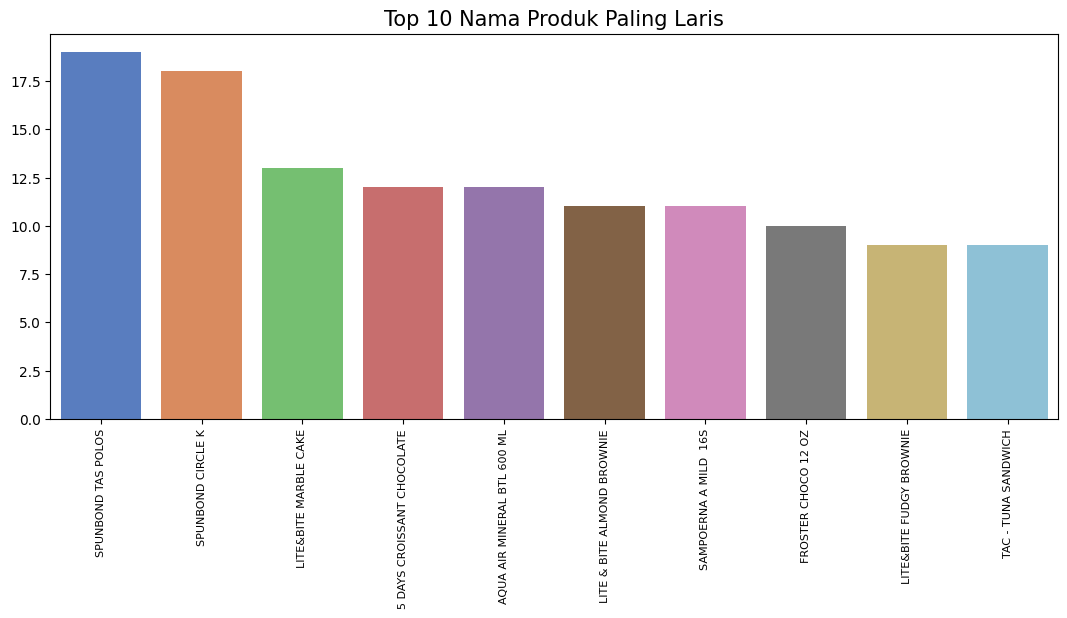

In [13]:
# Top 10 Produk Paling Laris

plt.figure(figsize=(13,5))
sns.set_palette('muted')

sns.barplot(x = df["Product Name"].value_counts()[:10].index,
            y = df["Product Name"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 8, rotation = 90)
plt.title('Top 10 Nama Produk Paling Laris',size = 15)

Text(0.5, 1.0, 'Total Transaksi Tiap Hari')

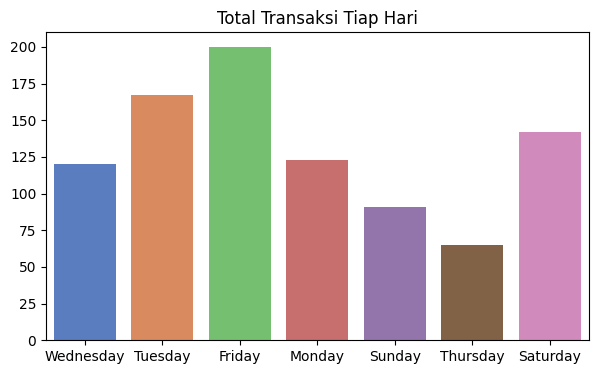

In [14]:
df_bulan = df.groupby('Hari')['Receiveno'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

plt.figure(figsize=(7,4))
sns.barplot(x = df['Hari'].unique(), y = df_bulan.values)

plt.xticks(size = 10)
plt.title('Total Transaksi Tiap Hari', size = 12)

Text(0.5, 1.0, 'Total Transaksi Tiap Bulan')

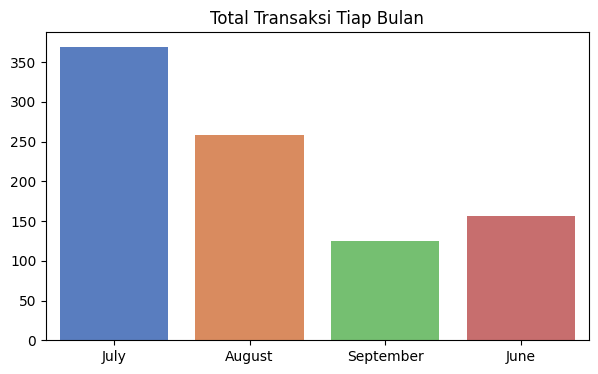

In [15]:
df_bulan = df.groupby('Bulan')['Receiveno'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

plt.figure(figsize=(7,4))
sns.barplot(x = df['Bulan'].unique(), y = df_bulan.values)

plt.xticks(size = 10)
plt.title('Total Transaksi Tiap Bulan', size = 12)

Text(0.5, 1.0, 'Total Transaksi Tiap Waktu')

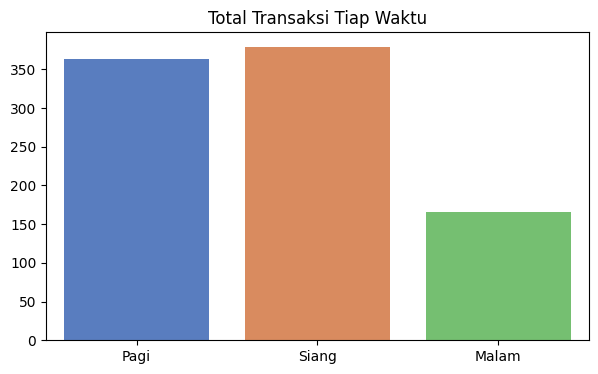

In [16]:
df_bulan = df.groupby('Waktu')['Receiveno'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

plt.figure(figsize=(7,4))
sns.barplot(x = df['Waktu'].unique(), y = df_bulan.values)

plt.xticks(size = 10)
plt.title('Total Transaksi Tiap Waktu', size = 12)

Text(0.5, 1.0, 'Total Transaksi Saat Toko Buka-Tutup Berdasarkan Jam')

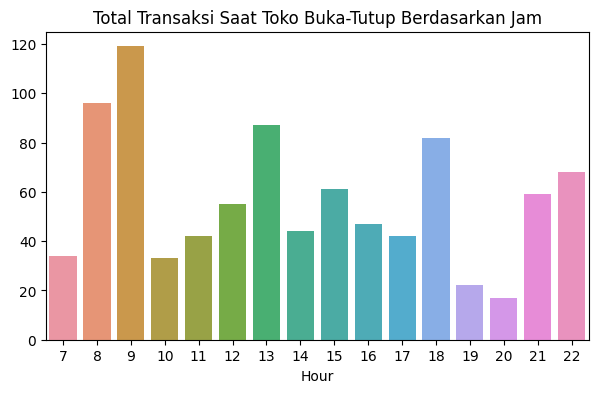

In [17]:
df_jam = df.groupby('Hour')['Receiveno'].count()

plt.figure(figsize=(7,4))
sns.barplot(x = df_jam.index, y = df_jam.values)

plt.xticks(size = 10)
plt.title('Total Transaksi Saat Toko Buka-Tutup Berdasarkan Jam', size = 12)

# Data Modelling

In [18]:
item_count_pivot = df.pivot_table(index='Receiveno',columns='Product Name', values= 'Qty',aggfunc='sum').fillna(0)
item_count_pivot[item_count_pivot > 0] =1
item_count_pivot.head(10)

Product Name,5 DAYS CROISSANT CHOCOLATE,5 DAYS CROISSANT MIXED BERRIES,ABC KACANG HIJAU 250ML,ABC SELERA PDS AYAMPDS LIM 80GR,ABC SQUASH ORANGE BTL 460ML,AIR SANITIZER AEROSOL 200 ML,ALPENLIEBE STICK CARAMEL 32GR,ANTANGIN JRG SIRUP 15 ML,ANTIS GEL JERUK NIPIS 60ML,ANTIS HAND SNTZR JERUK N 55 ML,AQUA AIR MINERAL BTL 1500 ML,AQUA AIR MINERAL BTL 330 ML,AQUA AIR MINERAL BTL 600 ML,AQUA CLICK N GO 750 ML,ASTOR CHOCOLATE STICK 150 GR,ASTOR DOUBLE COKLAT PACK 40 GR,BAKPAO ISI 10,BATAGOR CUPLIS ISI 5,BEAR BRAND EVAP MILK CAN 195ML,BENDERA SKM CHOCO PCH 200GR,BENG BENG MAXX PACK 32GR,BENG BENG WAFER BAR 22 GR,BIG BABOL FILIFOLLY 11 GR,BIG BABOL GUM KRIM STRAWB 22GR,BIMOLI KLASIK POUCH 2LT,BINTANG RADLER LEMON 0% 330 ML,BIORE BF WHITENING SCRUB 100ML,BOHEM CIGAR MOJITO DOUBLE,BUAVITA ORANGE JUICE TP 250 ML,BURGER,CADBURY CASHEW NUT 62GR,CAMEL MILD OPTION PURPLE 12S,CAP LANG KOOL FEVER BABY 1S,CAP LANG MYK KY P P60,CAPLANG MYK K.PTH ARMTRPHY 60M ...,CERES HAGELSLAG CLASSIC 90GR,CERES HAGELSLAG CLASSIC PAC,CHARM PANTY P.S. SWEET ROSE20S,CHEETOS CHICKEN GRILL 75 GR,CHEETOS ROASTED CORN 75 GR,CHEETOS TWIST BBQ 75 GR,CHEETOS TWIST JAGUNG BAKAR 40G,CHITATO MAXX SPCY MAXICAN 55GR,CHITATO SAPI PANGGANG 68 GR,CHITATO SPICY GRILLED BEEF 68G ...,CHOCO MILK,CHUPA CHUPS ORI ICE CRM,CHUPA CHUPS TROPICAL FIZZ,CIMORY YOGHURT MIXFRT BTL 250ML,CK BLACK PEPPER BEEF RICE 320G,CK CHICKN TERIYAKI 320G,CK COFFE INDONESIA ORI ACEH,CK COFFEE MOCHA 8OZ,CK COFFEE TIRAMISU 8OZ,CK CURRY WITH RICE 320 GR,CK FETTUCINI CARBONARA 300GR,CK LIGHTER BENETTON SOLID,CK LIGHTER DESIGN ELECTRIC,CK MACARONI CHEESE 300GR,CK MATCHA LATTE 8OZ,CK MILKY CHOCOLATE 8OZ,CK MINI LIGHTER BENETTON ELECT,CK PREMIUM LIGHTER,CK SPAGHETTI BOLOGNESE 320G,CLEO MINERAL WTR 600M,COCA COLA PET 390ML,CRYSTALNE AIR MNRL600,DELFI CHA CHA TUBE 40 GR,DELFI MALTITOS 45 GR,DELFI MINIS TB POLICE HAT 40GR,DELFI TAKE IT BIG 33GR,DELFI YURAKU BLACK THUNDER 21G,DELFI ZAP CHOC 42GR,DETTOL SHOWR FOAM ORI BTL 100M ...,DETTOL SHWR F FRESH BTL 100ML,DETTOL WET WIPES PACK 10S,DIAMOND F.M CHOCO TP 1 L,DIAMOND F.M PLAIN TP 350 ML,DIAMOND F.M PLAIN TP 946ML,DIAMOND JJ APEL BTL 500 ML,DIAMOND JJ ORANGE BTL 500 ML,DIET COKE CAN 330 ML,DILMAH ENGLISH BREAKFAST TEA,DIM SUM ISI 10,DJARUM LA LIGHT MENTHOL 16S,DJARUM LA LIGHTS ICE PACK 16S,DJARUM SUPER 12S,DORITOS BBQ 160GR,DUA KELINCI HOTNUT RS CABE 70G,DUA KELINCI MIX NUT 80 GR,DUNHILL FINE CUT MILD 20S,DUNHILL INTRN MNTHOL HJAU 20S,DUREX ID FETHERLITE BOX 12S,DUREX PLAY VIBRATIONS,ENERGIZER ALKALINE E92 AAA-4S,ESSE BLUE 20S,ESSE CHANGE,ESSE CHANGE GRAPE,FANTA STRAWBERRY PET 390ML,FATIGON KAPLET 4S,FF SWISS CHOCO TP 225ML,FIESTA CONDOM MAX DOTTED 3S,FISHERMAN FRN ORI EXT STRG 25GR,FITBAR CHOCOLATE PCK 25 GR,FITBAR NUTS PCS 25 GR,FITCHIPS HONEY BBQ 60GR,FLORIDINA ORANGE BTL 360 ML,FORMULA SKT GG FLIPGO,FORMULA TBRUSH DISC EXTR CLN,FRENCH FRIES SAMBAL TOMAT 62GR,FRESH CARE ORIGINAL BTL 10M ...,FRESTEA APEL BTL 500 ML,FRISIAN FLAG KACANG HIJAU 225M,FROSTBITE CUP PARI PARI VANILL ...,FROSTBITE PARI CHOCOLATE 90ML,FROSTBITE PARI PARI VNILA 55ML,FROSTBITE VANILLA CHOCONUT 60M ...,FROSTER CHEESE MILK 12 OZ,FROSTER CHEESE MILK 16 OZ,FROSTER CHOCO 12 OZ,FROSTER CHOCO 16 OZ,FROSTER STRAWBERRY 12 OZ,FROSTER STRAWBERRY 16 OZ,FS GULA PASIR KUNING 1KG,GARUDA KACANG KULIT 250 GR,GARUDA TING TING POUCH CM (CM ...,GG FILTER 12S,GG SURYA PRO MILD 16S,GOLDA DOLCE LATTE 200ML,GOOD DAY CHOCOCINNO 3IN1 5X20GR,GOOD DAY FUN MOCACINNO 250ML,GOOD DAY MOCCA LATTE 200 ML,GOOD DAY MOCCACINO 3IN1 5X20GR,GOOD DAY ORIG CAPPUCCINO 250ML,GOOD DAY TIRAMISU BLISS 250ML,GOOD MOOD STRAWBERRY 450ML,GOODTIME DOUBLE CHOCO CKS 72GR,GORENGAN RISOL,GRASS JELLY CAP PANDA CAN 310M,GREENFIELD FRESH MILK FC 200ML,GREENFIELDS FM CHOCOMALT 500ML,GUDANG GARAM SIGNATURE 12S,HAKU MONAKA VANILLA 180ML,HAND SANITIZER SPRAY 60 ML,HANSAPLAST AQUA PROTECT 6S,HANZEL HAZELNUT C BAR,HAPPYDENT WHITE BKG SODA 11.2GR,HARIBO GOLDBEARS PCK 30 GR,HEAD&SHOULDERS COOL MNTHL 75ML,HEAVENLY BLUSH GREEK 100 ML,HEAVENLY BLUSH GREEK STRW 100M,H

In [19]:
# Keterangan Olah Dataset
print('Dimensi Dataset :',item_count_pivot.shape)
print('Jumlah Transaksi :',item_count_pivot.shape[0])
print('Jumlah Barang :',item_count_pivot.shape[1])

Dimensi Dataset : (87, 407)
Jumlah Transaksi : 87
Jumlah Barang : 407


In [20]:
# # Transformasi Data Sparse Matrix
# te = TransactionEncoder()
# te_ary = te.fit(item_count_pivot).transform(item_count_pivot)
# df = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
# # Tentukan nilai support yang akan diuji
# support_list = [0.001, 0.002, 0.003, 0.004, 0.005]

# # Tentukan ukuran frequent itemset yang diinginkan
# size = 2

# # Cari nilai support yang optimal
# optimal_support = None
# optimal_itemsets = None
# for support in support_list:
#     frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
#     itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x)) == size]
#     if len(itemsets) > 0:
#         optimal_support = support
#         optimal_itemsets = itemsets
#         break

# # Print hasil
# print('Optimal support:', optimal_support)
# print('Frequent itemsets:')
# print(optimal_itemsets)

In [22]:
freq = apriori(item_count_pivot, min_support= 0.06, use_colnames= True)
freq.sort_values('support',ascending=False)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
18,0.218391,(SPUNBOND TAS POLOS)
17,0.206897,(SPUNBOND CIRCLE K)
13,0.149425,(LITE&BITE MARBLE CAKE)
0,0.137931,(5 DAYS CROISSANT CHOCOLATE)
2,0.137931,(AQUA AIR MINERAL BTL 600 ML)
8,0.126437,(LITE & BITE ALMOND BROWNIE)
16,0.126437,(SAMPOERNA A MILD 16S)
6,0.114943,(FROSTER CHOCO 12 OZ)
19,0.103448,(TAC - TUNA SANDWICH)
27,0.103448,"(LITE&BITE MARBLE CAKE, LITE&BITE FUDGY BROWNIE)"


In [23]:
rules = association_rules(freq,metric='lift',min_threshold=1)[['antecedents','consequents','support','confidence','lift']]
rules.sort_values(by=['support', 'confidence', 'lift', 'conviction'], ascending=False, inplace=True)

,antecedents,consequents,support,confidence,lift
7,(LITE&BITE FUDGY BROWNIE),(LITE&BITE MARBLE CAKE),0.103448,1.000000,6.692308
6,(LITE&BITE MARBLE CAKE),(LITE&BITE FUDGY BROWNIE),0.103448,0.692308,6.692308
8,(TAC - TUNA SANDWICH),(LITE&BITE MARBLE CAKE),0.091954,0.888889,5.948718
2,(LITE & BITE ALMOND BROWNIE),(LITE&BITE MARBLE CAKE),0.091954,0.727273,4.867133
9,(LITE&BITE MARBLE CAKE),(TAC - TUNA SANDWICH),0.091954,0.615385,5.948718
3,(LITE&BITE MARBLE CAKE),(LITE & BITE ALMOND BROWNIE),0.091954,0.615385,4.867133
13,(TAC BROWN BREAD TUNA CHEESE),(TAC - TUNA SANDWICH),0.080460,1.000000,9.666667
12,(TAC - TUNA SANDWICH),(TAC BROWN BREAD TUNA CHEESE),0.080460,0.777778,9.666667
28,"(TAC BROWN BREAD TUNA CHEESE, LITE&BITE MARBLE...",(TAC - TUNA SANDWICH),0.068966,1.000000,9.666667
15,"(LITE & BITE ALMOND BROWNIE, LITE&BITE FUDGY B...",(LITE&BITE MARBLE CAKE),0.068966,1.000000,6.692308
